<a href="https://www.kaggle.com/code/sc0v1n0/easyga-learning-knapsack-low-dimensional-0-1?scriptVersionId=194822967" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

-----

# Setting Environment

In [1]:
%pip install easyga -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cartopy 0.23.0 requires matplotlib>=3.5, but you have matplotlib 3.3.4 which is incompatible.
arviz 0.19.0 requires matplotlib>=3.5, but you have matplotlib 3.3.4 which is incompatible.
beatrix-jupyterlab 2024.66.154055 requires jupyterlab~=3.6.0, but you have jupyterlab 4.2.4 which is incompatible.
fitter 1.7.1 requires matplotlib<4.0.0,>=3.7.2, but you have matplotlib 3.3.4 which is incompatible.
mne 1.8.0 requires matplotlib>=3.6, but you have matplotlib 3.3.4 which is incompatible.
plotnine 0.13.6 requires matplotlib>=3.7.0, but you have matplotlib 3.3.4 which is incompatible.
pointpats 2.5.0 requires matplotlib>=3.6, but you have matplotlib 3.3.4 which is incompatible.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have

-------------

# Load Data

**Resources**:

- [Instances of 0/1 Knapsack Problem](http://artemisa.unicauca.edu.co/~johnyortega/instances_01_KP/)
- [David Pisinger's optimization codes - Generator dataset](http://hjemmesider.diku.dk/~pisinger/codes.html)

In [2]:
import pandas as pd

ds = pd.read_csv('/kaggle/input/dataset-low-dimensional-01-knapsack-problems/low_dimensional/f2_l_d_kp_20_878.csv')
ds

,value,weight
0,20,878
1,44,92
2,46,4
3,90,43
4,72,83
5,91,84
6,40,68
7,75,92
8,35,82
9,8,6


In [3]:
ds.shape

(21, 2)

------

# Development

In [4]:
capacity: int = 878
optimzal_solution: int = 1024

In [5]:
import EasyGA
import random

In [6]:
def fitness_function(solution):
    fitness: int = 0
    sum_capacity: int = 0
    for i in range(len(solution)):
        if solution[i] == 1:
            fitness += ds['value'][i]
            sum_capacity += ds['weight'][i]
    if sum_capacity > capacity:
        fitness: int = 0
    return fitness

-----

# First Test

In [7]:
ga = EasyGA.GA()

ga.population_size = 100
ga.chromosome_length = len(ds['value'])
ga.generation_goal = 1000

ga.gene_impl = lambda: random.randint(0,1)

ga.target_fitness_type = 'max'

ga.fitness_goal = optimzal_solution

In [8]:
ga.fitness_function_impl = fitness_function

In [9]:
from EasyGA import crossover, mutation

In [10]:
ga.crossover_individual_impl = crossover.Crossover.Individual.single_point
ga.mutation_individual_impl = mutation.Mutation.Individual.individual_genes 

In [11]:
while ga.active():
    ga.evolve(20)
    ga.print_generation()
    ga.print_best_chromosome()

Current Generation 	: 20
Best Chromosome 	: [0][0][1][1][1][1][1][1][1][0][1][1][1][1][0][1][1][1][0][1][1]
Best Fitness    	: 989
Current Generation 	: 40
Best Chromosome 	: [0][0][1][1][1][1][1][1][1][1][1][1][1][1][0][1][0][1][1][1][1]
Best Fitness    	: 1009
Current Generation 	: 60
Best Chromosome 	: [0][0][1][1][1][1][1][1][1][1][1][1][1][1][0][1][0][1][1][1][1]
Best Fitness    	: 1009
Current Generation 	: 72
Best Chromosome 	: [0][1][1][1][1][1][1][1][1][1][1][1][1][1][0][1][0][1][0][1][1]
Best Fitness    	: 1024


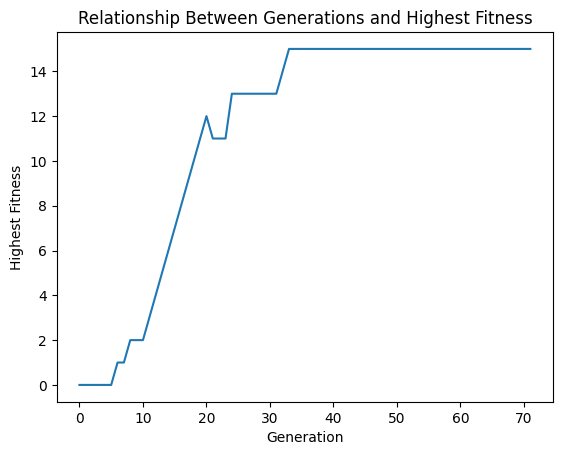

In [12]:
ga.graph.highest_value_chromosome()
ga.graph.show()

-----

# Second Test

In [13]:
import pandas as pd

ds = pd.read_csv('/kaggle/input/dataset-low-dimensional-01-knapsack-problems/low_dimensional/f10_l_d_kp_20_879.csv')
ds

,value,weight
0,20,879
1,91,84
2,72,83
3,90,43
4,46,4
5,55,44
6,8,6
7,35,82
8,75,92
9,61,25


In [14]:
ga = EasyGA.GA()

ga.population_size = 100
ga.chromosome_length = len(ds['value'])
ga.generation_goal = 1000

ga.gene_impl = lambda: random.randint(0,1)

ga.target_fitness_type = 'max'

ga.fitness_goal = optimzal_solution

In [15]:
ga.fitness_function_impl = fitness_function

In [16]:
from EasyGA import crossover, mutation

In [17]:
ga.crossover_individual_impl = crossover.Crossover.Individual.single_point
ga.mutation_individual_impl = mutation.Mutation.Individual.individual_genes 

In [18]:
while ga.active():
    ga.evolve(20)
    ga.print_generation()
    ga.print_best_chromosome()

Current Generation 	: 20
Best Chromosome 	: [0][1][1][1][1][1][1][1][1][1][0][1][1][1][1][1][1][1][1][0][0]
Best Fitness    	: 987
Current Generation 	: 39
Best Chromosome 	: [0][1][1][1][1][1][1][1][1][1][0][1][1][1][1][0][1][0][1][1][1]
Best Fitness    	: 1025


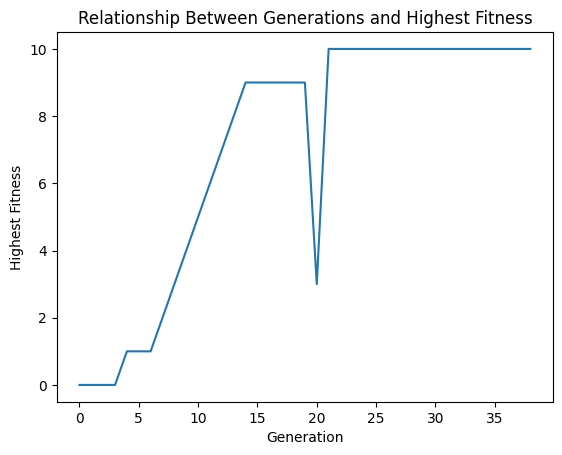

In [19]:
ga.graph.highest_value_chromosome()
ga.graph.show()